<a href="https://colab.research.google.com/github/DotBion/sentiment-analysis-nyu-dsb/blob/mod/SentimentAnalysis_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing necessary libraries**

In [149]:
!pip install pycountry

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
# Load dataset
df = pd.read_csv('/content/sentimentdataset.csv')

In [152]:
print(df.shape)
df.head()

(732, 15)


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [153]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [154]:
# Summary stats
df.describe(include='all')

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
count,732.000000,732.000000,732,732,732,732,732,732,732.000000,732.000000,732,732.000000,732.000000,732.000000,732.000000
unique,NaN,NaN,707,279,683,685,4,697,NaN,NaN,115,NaN,NaN,NaN,NaN
top,NaN,NaN,"A compassionate rain, tears of empathy fallin...",Positive,2019-04-05 17:30:00,WinterWarmth,Instagram,#Hopeful #SeedsOfOptimism,NaN,NaN,USA,NaN,NaN,NaN,NaN
freq,NaN,NaN,3,44,3,3,258,3,NaN,NaN,59,NaN,NaN,NaN,NaN
mean,366.464481,369.740437,NaN,NaN,NaN,NaN,NaN,NaN,21.508197,42.901639,NaN,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,NaN,NaN,NaN,NaN,NaN,NaN,7.061286,14.089848,NaN,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,10.000000,NaN,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,NaN,NaN,NaN,NaN,NaN,NaN,17.750000,34.750000,NaN,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,43.000000,NaN,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,50.000000,NaN,2023.000000,9.000000,22.000000,19.000000


In [155]:
# Value counts
print("\nSentiment counts:\n", df['Sentiment'].value_counts())
print("\nPlatform counts:\n", df['Platform'].value_counts())
print("\nCountry counts:\n", df['Country'].value_counts().head(10))


Sentiment counts:
 Sentiment
Positive               44
Joy                    42
Excitement             32
Happy                  14
Neutral                14
                       ..
Vibrancy                1
Culinary Adventure      1
Mesmerizing             1
Thrilling Journey       1
Winter Magic            1
Name: count, Length: 279, dtype: int64

Platform counts:
 Platform
Instagram     258
Facebook      231
Twitter       128
Twitter       115
Name: count, dtype: int64

Country counts:
 Country
USA               59
USA               55
UK                49
Canada            44
Australia         41
Canada            34
UK                33
India             21
USA               20
Canada            17
Name: count, dtype: int64


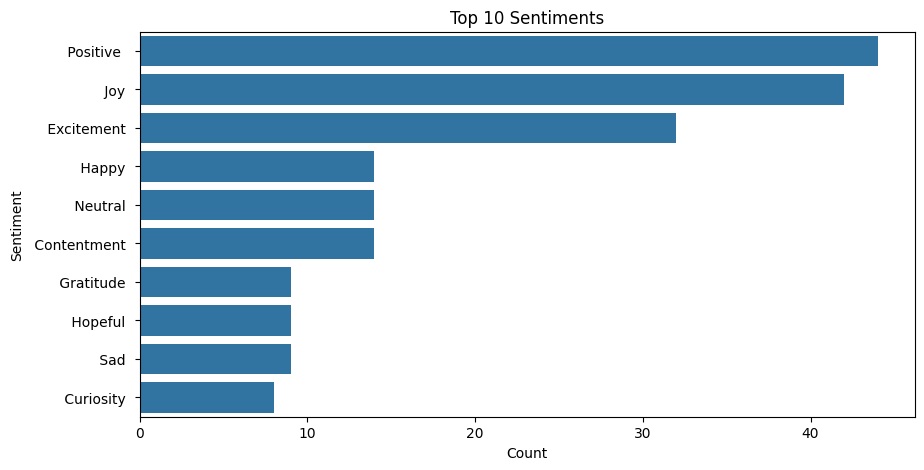

In [156]:
# Visualize Sentiment Distribution
plt.figure(figsize=(10, 5))
sns.countplot(y='Sentiment', data=df, order=df['Sentiment'].value_counts().index[:10])
plt.title("Top 10 Sentiments")
plt.xlabel("Count")
plt.ylabel("Sentiment")
plt.show()

# **DATA CLEANING**

We clean unnecessary columns (Unnamed: 0, etc.), handle missing values, standardize Platform, Country, and Sentiment, and ensure all data types are correct. We also convert Timestamp to datetime and extract Hour, Day, Month, DayOfWeek.

In [157]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], errors='ignore')

In [158]:
text_columns = ['Platform', 'Country', 'Sentiment', 'Hashtags', 'User']
for col in text_columns:
    df[col] = df[col].astype(str).str.strip().str.title()

In [159]:
import re

# Normalize and clean sentiment values
df['Sentiment_clean'] = (
    df['Sentiment']
    .str.strip()
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)  # remove punctuation
    .str.replace(r'\d+', '', regex=True)      # remove numbers
)

In [160]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.day_name()

In [161]:
country_map = {
    'United States': 'USA',
    'Usa': 'USA',
    'U.S.A.': 'USA',
    'Uk': 'UK',
    'United Kingdom': 'UK',
    'India ': 'India',
    'Can': 'Canada',
    'Aus': 'Australia'
}
df['Country'] = df['Country'].replace(country_map)

In [162]:
platform_map = {
    'Instagram ': 'Instagram',
    'Fb': 'Facebook',
    'Insta': 'Instagram',
    'X': 'Twitter'
}
df['Platform'] = df['Platform'].replace(platform_map)

In [163]:
df['Text']=df['Text'].replace(r'\W',' ')

# **SENTIMENT GROUPING**

The dataset originally contains 270+ raw sentiment labels (like joy, guilt, awe). We normalize and group these into 3 major sentiment categories:

- positive

- negative

- neutral

This improves readability and consistency in analysis.

In [164]:
sentiment_map = {
    #Positive Emotions
    'positive': 'positive',
    'happy': 'positive',
    'excited': 'positive',
    'joyful': 'positive',
    'joy': 'positive',
    'gratitude': 'positive',
    'grateful': 'positive',
    'hopeful': 'positive',
    'content': 'positive',
    'contentment': 'positive',
    'uplifted': 'positive',
    'inspired': 'positive',
    'love': 'positive',
    'peaceful': 'positive',
    'serenity': 'positive',
    'relief': 'positive',
    'excitement': 'positive',
    'thrilling journey': 'positive',
    'creative inspiration': 'positive',
    'culinary adventure': 'positive',
    'runway creativity': 'positive',
    'awe': 'positive',
    'euphoria': 'positive',
    'joy in baking': 'positive',
    'celestial wonder': 'positive',
    'natures beauty': 'positive',
    'winter magic': 'positive',
    'mesmerizing': 'positive',
    'wonder': 'positive',
    'pride': 'positive',
    'elation': 'positive',
    'enthusiasm': 'positive',
    'determination': 'positive',
    'hope': 'positive',
    'inspiration': 'positive',
    'empowerment': 'positive',
    'happiness': 'positive',
    'playful': 'positive',
    'fulfillment': 'positive',
    'admiration': 'positive',
    'tenderness': 'positive',
    'compassion': 'positive',
    'compassionate': 'positive',
    'reverence': 'positive',
    'reflection': 'positive',
    'thrill': 'positive',
    'enchantment': 'positive',
    'confident': 'positive',
    'empathetic': 'positive',
    'proud': 'positive',
    'surprise': 'positive',
    'amusement': 'positive',
    'kind': 'positive',
    'creativity': 'positive',
    'harmony': 'positive',
    'satisfaction': 'positive',
    'freespirited': 'positive',
    'accomplishment': 'positive',
    'adventure': 'positive',
    'affection': 'positive',
    'enjoyment': 'positive',
    'anticipation': 'positive',
    'adoration': 'positive',
    'zest': 'positive',
    'radiance': 'positive',
    'whimsy': 'positive',
    'captivation': 'positive',
    'coziness': 'positive',
    'rejuvenation': 'positive',
    'exploration': 'positive',
    'overjoyed': 'positive',
    'motivation': 'positive',
    'elegance': 'positive',
    'mindfulness': 'positive',
    'dreamchaser': 'positive',
    'playfuljoy': 'positive',
    'optimism': 'positive',
    'blessed': 'positive',
    'joyfulreunion': 'positive',
    'appreciation': 'positive',
    'confidence': 'positive',
    'adrenaline': 'positive',
    'artisticburst': 'positive',
    'culinaryodyssey': 'positive',
    'melodic': 'positive',
    'spark': 'positive',
    'marvel': 'positive',
    'resilience': 'positive',
    'festivejoy': 'positive',
    'innerjourney': 'positive',
    'freedom': 'positive',
    'dazzle': 'positive',
    'positivity': 'positive',
    'kindness': 'positive',
    'friendship': 'positive',
    'success': 'positive',
    'amazement': 'positive',
    'romance': 'positive',
    'grandeur': 'positive',
    'energy': 'positive',
    'celebration': 'positive',
    'charm': 'positive',
    'ecstasy': 'positive',
    'colorful': 'positive',
    'hypnotic': 'positive',
    'connection': 'positive',
    'iconic': 'positive',
    'journey': 'positive',
    'engagement': 'positive',
    'touched': 'positive',
    'triumph': 'positive',
    'heartwarming': 'positive',
    'breakthrough': 'positive',
    'imagination': 'positive',
    'vibrancy': 'positive',
    'renewed effort': 'positive',

    #Negative Emotions
    'negative': 'negative',
    'angry': 'negative',
    'frustrated': 'negative',
    'disappointed': 'negative',
    'sad': 'negative',
    'upset': 'negative',
    'tired': 'negative',
    'irritated': 'negative',
    'stressed': 'negative',
    'overwhelmed': 'negative',
    'despair': 'negative',
    'loneliness': 'negative',
    'lost': 'negative',
    'afraid': 'negative',
    'worried': 'negative',
    'gloomy': 'negative',
    'grief': 'negative',
    'confusion': 'negative',
    'embarrassed': 'negative',
    'guilt': 'negative',
    'shame': 'negative',
    'fear': 'negative',
    'heartbreak': 'negative',
    'ambivalence': 'negative',
    'melancholy': 'negative',
    'regret': 'negative',
    'bad': 'negative',
    'hate': 'negative',
    'indifference': 'negative',
    'frustration': 'negative',
    'numbness': 'negative',
    'disgust': 'negative',
    'bitterness': 'negative',
    'betrayal': 'negative',
    'devastated': 'negative',
    'jealousy': 'negative',
    'fearful': 'negative',
    'resentment': 'negative',
    'desolation': 'negative',
    'boredom': 'negative',
    'bitter': 'negative',
    'jealous': 'negative',
    'envious': 'negative',
    'dismissive': 'negative',
    'sadness': 'negative',
    'anger': 'negative',
    'intimidation': 'negative',
    'anxiety': 'negative',
    'helplessness': 'negative',
    'envy': 'negative',
    'apprehensive': 'negative',
    'disappointment': 'negative',
    'sorrow': 'negative',
    'loss': 'negative',
    'mischievous': 'negative',
    'isolation': 'negative',
    'bittersweet': 'negative',
    'emotionalstorm': 'negative',
    'suffering': 'negative',
    'darkness': 'negative',
    'exhaustion': 'negative',
    'lostlove': 'negative',
    'ruins': 'negative',
    'desperation': 'negative',
    'solitude': 'negative',
    'heartache': 'negative',
    'obstacle': 'negative',
    'pressure': 'negative',
    'miscalculation': 'negative',
    'suspense': 'negative',
    'challenge': 'negative',

    #Neutral/Reflective
    'neutral': 'neutral',
    'okay': 'neutral',
    'bored': 'neutral',
    'confused': 'neutral',
    'calm': 'neutral',
    'mixed': 'neutral',
    'blank': 'neutral',
    'curious': 'neutral',
    'curiosity': 'neutral',
    'chill': 'neutral',
    'nostalgia': 'neutral',
    'whispers of the past': 'neutral',
    'oceans freedom': 'neutral',
    'acceptance': 'neutral',
    'uncertainty': 'neutral',
    'calmness': 'neutral',
    'stillness': 'neutral',
    'arousal': 'neutral',
    'boredom': 'neutral',
    'yearning': 'neutral',
    'contemplation': 'neutral',
    'emotion': 'neutral',
    'pensive': 'neutral',
    'tranquility': 'neutral',
    'immersion': 'neutral',
    'intrigue': 'neutral',
    'wonderment': 'neutral',
    'sympathy': 'neutral',
    'solace': 'neutral',
    'envisioning history': 'neutral',
    'reflection': 'neutral'
}

In [165]:
# Apply mapping
df['Sentiment_grouped'] = df['Sentiment_clean'].map(sentiment_map)

In [166]:
# Apply the updated map
df['Sentiment_grouped'] = df['Sentiment_clean'].map(sentiment_map)

# Check what's still not covered
remaining = df[df['Sentiment_grouped'].isna()]['Sentiment_clean'].value_counts()
print("Remaining unmapped sentiments:\n", remaining.head(100))
print(f"Remaining unmapped total: {remaining.shape[0]}")

Remaining unmapped sentiments:
 Series([], Name: count, dtype: int64)
Remaining unmapped total: 0


In [167]:
df = df.drop_duplicates()

In [168]:
print(df.isnull().sum())

Text                 0
Sentiment            0
Timestamp            0
User                 0
Platform             0
Hashtags             0
Retweets             0
Likes                0
Country              0
Year                 0
Month                0
Day                  0
Hour                 0
Sentiment_clean      0
DayOfWeek            0
Sentiment_grouped    0
dtype: int64


In [169]:
df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce').astype('Int64')
df['Retweets'] = pd.to_numeric(df['Retweets'], errors='coerce').astype('Int64')

<ipython-input-169-32f97140b54b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-169-32f97140b54b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [170]:
df['Hashtag_List'] = df['Hashtags'].str.lower().str.replace('#', '', regex=False).str.split()

<ipython-input-170-26d95637587c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [171]:
print(df.dtypes)
print(df.head())

Text                         object
Sentiment                    object
Timestamp            datetime64[ns]
User                         object
Platform                     object
Hashtags                     object
Retweets                      Int64
Likes                         Int64
Country                      object
Year                          int32
Month                         int32
Day                           int32
Hour                          int32
Sentiment_clean              object
DayOfWeek                    object
Sentiment_grouped            object
Hashtag_List                 object
dtype: object
                                                Text Sentiment  \
0   Enjoying a beautiful day at the park!        ...  Positive   
1   Traffic was terrible this morning.           ...  Negative   
2   Just finished an amazing workout! 💪          ...  Positive   
3   Excited about the upcoming weekend getaway!  ...  Positive   
4   Trying out a new recipe for dinner tonig

# **Sentiment Distribution & Temporal Trends**

We visualize how sentiment is distributed across posts, and how it fluctuates over time — particularly by hour of day. This helps detect when certain emotions are most frequently expressed.

<ipython-input-172-bd2cc6f75f5d>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




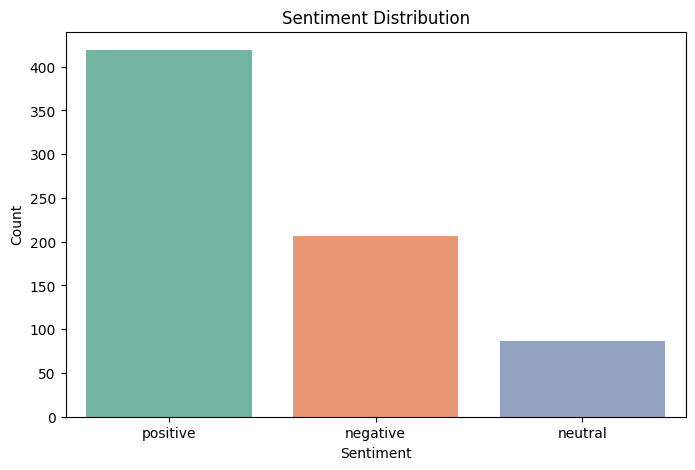

In [172]:
# Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment_grouped', palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

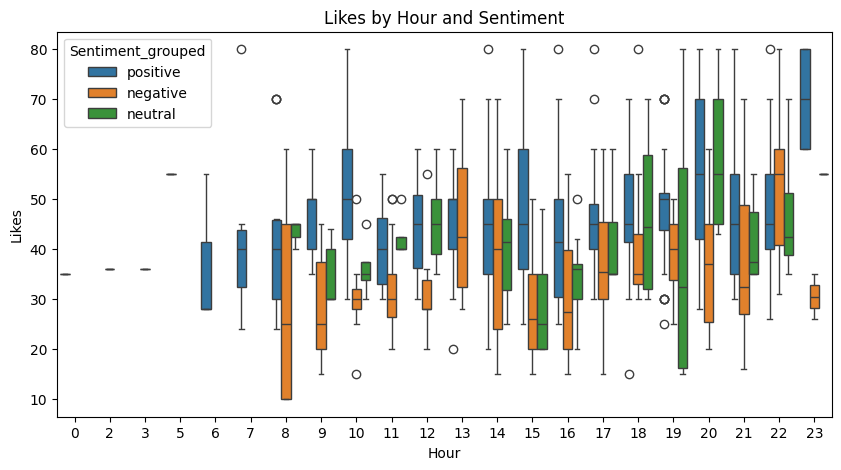

In [173]:
# Sentiment Over Time (Hour)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Hour', y='Likes', hue='Sentiment_grouped')
plt.title('Likes by Hour and Sentiment')
plt.show()

# **Engagement Analysis**

We study how likes and retweets vary by sentiment. We calculate average engagement per sentiment group and visualize which emotions drive more interaction.

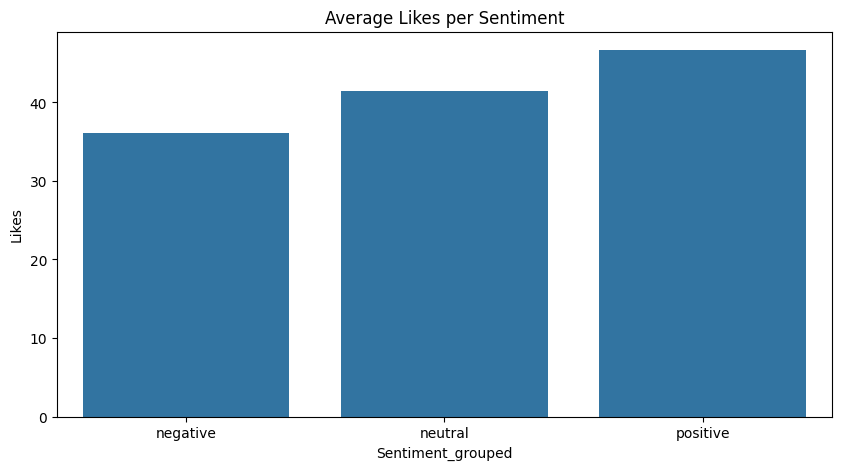

In [174]:
# Engagement by Sentiment
engagement = df.groupby('Sentiment_grouped')[['Likes', 'Retweets']].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=engagement, x='Sentiment_grouped', y='Likes')
plt.title('Average Likes per Sentiment')
plt.show()

# **Platform-wise Sentiment Trends**

This section compares sentiment distributions across different social media platforms like Twitter, Facebook, and Instagram. It shows how emotional tone varies by platform.


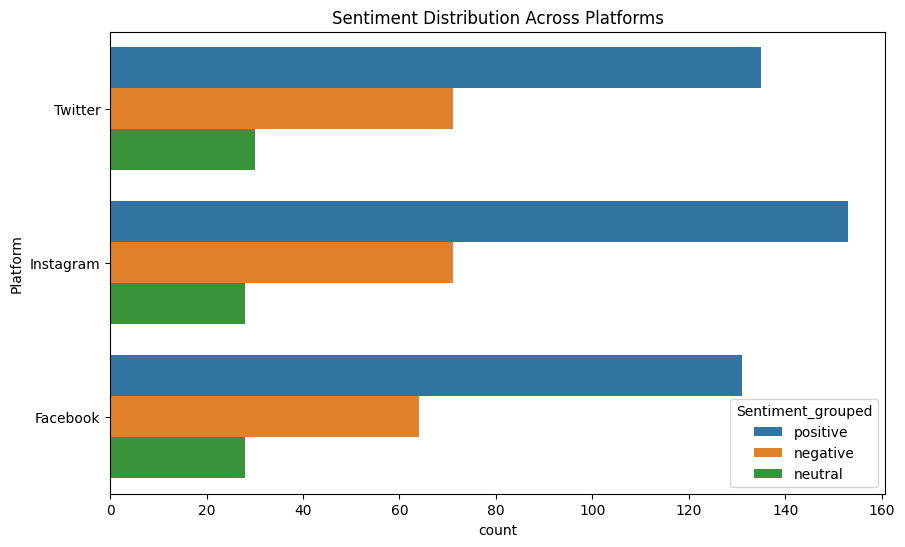

In [175]:
# Sentiment by Platform
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Platform', hue='Sentiment_grouped')
plt.title('Sentiment Distribution Across Platforms')
plt.show()

# **Geographical Trends**

We explore regional differences in sentiment using the Country column. The top 10 countries by post count are analyzed to see which regions lean more positive, negative, or neutral.

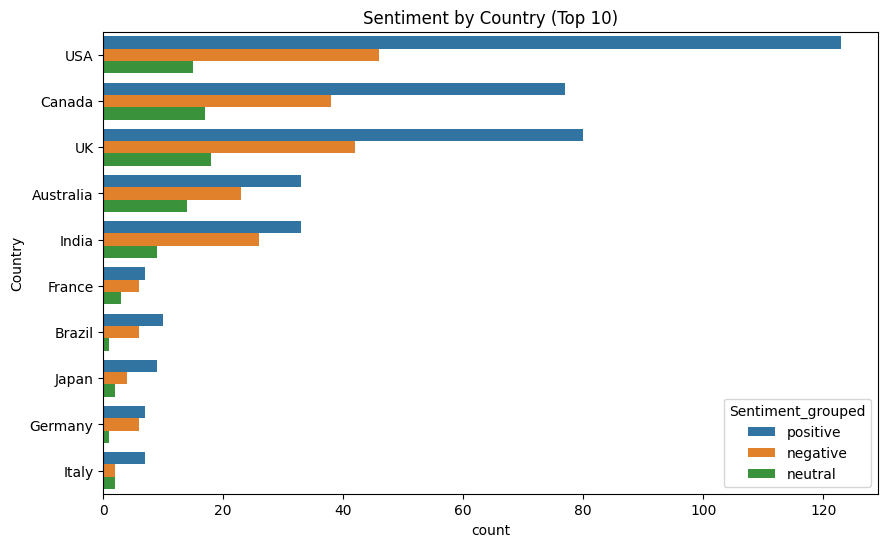

In [176]:
# Sentiment by Country
top_countries = df['Country'].value_counts().head(10).index
subset = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
sns.countplot(data=subset, y='Country', hue='Sentiment_grouped')
plt.title('Sentiment by Country (Top 10)')
plt.show()

In [177]:
import pandas as pd
import pycountry
import plotly.express as px

# Convert timestamps and extract date
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Date'] = df['Timestamp'].dt.date

# Clean up string fields
df['Country'] = df['Country'].str.strip()
df['Sentiment_grouped'] = df['Sentiment_grouped'].str.strip().str.capitalize()

# Replace country aliases
country_aliases = {
    'UK': 'United Kingdom',
    'Scotland': 'United Kingdom'
}
df['Country'] = df['Country'].replace(country_aliases)

# Only keep standard sentiment labels - not needed here
#sentiment_types = ['Positive', 'Neutral', 'Negative']
#df = df[df['Sentiment'].isin(sentiment_types)]

# Count tweets per date-country-sentiment
sentiment_daily = df.groupby(['Date', 'Country', 'Sentiment_grouped']).size().reset_index(name='Count')

# Get dominant sentiment for each country on each day
dominant_sentiment = sentiment_daily.sort_values('Count', ascending=False).drop_duplicates(['Date', 'Country'])

# Map sentiments to numerical scores
polarity_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
dominant_sentiment['Sentiment Score'] = dominant_sentiment['Sentiment_grouped'].map(polarity_map)

# Convert country names to ISO Alpha-3 codes
def get_iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

dominant_sentiment['iso_alpha'] = dominant_sentiment['Country'].apply(get_iso3)
dominant_sentiment = dominant_sentiment.dropna(subset=['iso_alpha'])

# Sort the data chronologically
dominant_sentiment = dominant_sentiment.sort_values("Date")

# Add flag emojis using regional indicator symbols
def to_flag(code):
    try:
        return ''.join([chr(127397 + ord(c)) for c in code])
    except:
        return ''

#dominant = dominant_sentiment.copy()
dominant_sentiment['Flag'] = dominant_sentiment['iso_alpha'].apply(to_flag)

# Add sentiment emoj



# Build hover label with flag and sentiment emoji
dominant_sentiment['HoverName'] = (
    dominant_sentiment['Flag'] + " " +
    dominant_sentiment['Country'] + " "
)

# Define soft color palette (pastel red → grey → green)
soft_color_scale = [
    (0.0, "#FF6961"),   # pastel red
    (0.5, "#FFB449 "),   # light grey
    (1.0, "#a1d99b")    # pastel green
]

# Create animated choropleth
fig = px.choropleth(
    dominant_sentiment,
    locations="iso_alpha",
    color="Sentiment Score",
    hover_name="Country",
    animation_frame=dominant_sentiment['Date'].astype(str),
    color_continuous_scale=soft_color_scale,
    range_color=[-1, 1],
    title="Daily Dominant Sentiment by Country"
)

# Customize layout and legend
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    coloraxis_colorbar=dict(
        title="Sentiment",
        tickvals=[-1, 0, 1],
        ticktext=["Negative", "Neutral", "Positive"]
    )
)
fig.update_geos(
    showcountries=True,
    showcoastlines=True,
    projection_type="natural earth",
    #projection_type="equirectangular",# Optional: try 'equirectangular' too
    # lataxis_range=[-100, 100],          # show more vertical area
    # lonaxis_range=[-180, 180]         # full horizontal span
)

# Show plot (if in notebook)
fig.show()

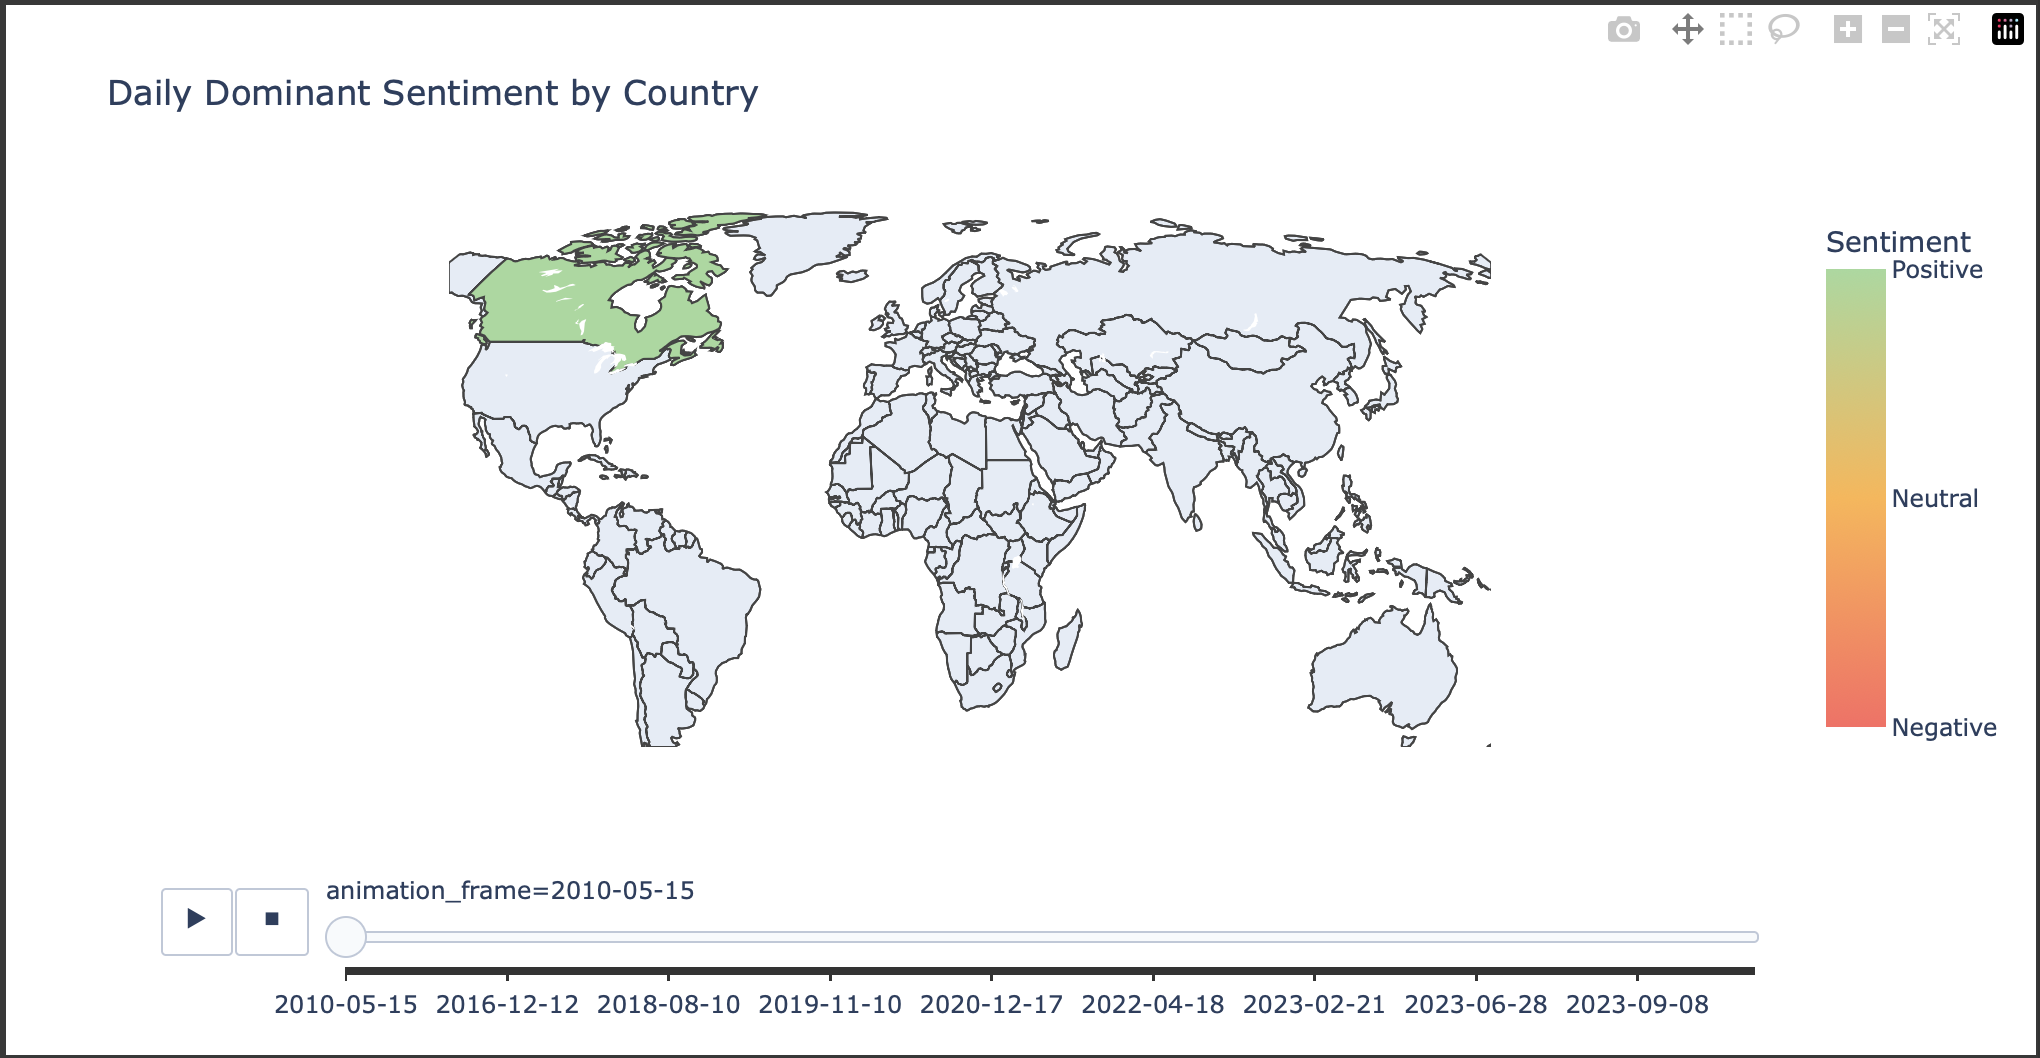

In [178]:
df = df.drop(columns=['Date'], errors='ignore') #undoing date column for viz

# **HASH TAG ANALYSIS**

We extract and explode hashtags, then analyze:

- Most frequently used hashtags

- Hashtags associated with each sentiment group

- Hashtags that receive the highest average likes and retweets

In [179]:
df_tags = df.explode('Hashtag_List')
df_tags = df_tags[df_tags['Hashtag_List'].notnull()]  # remove rows where hashtag list is NaN

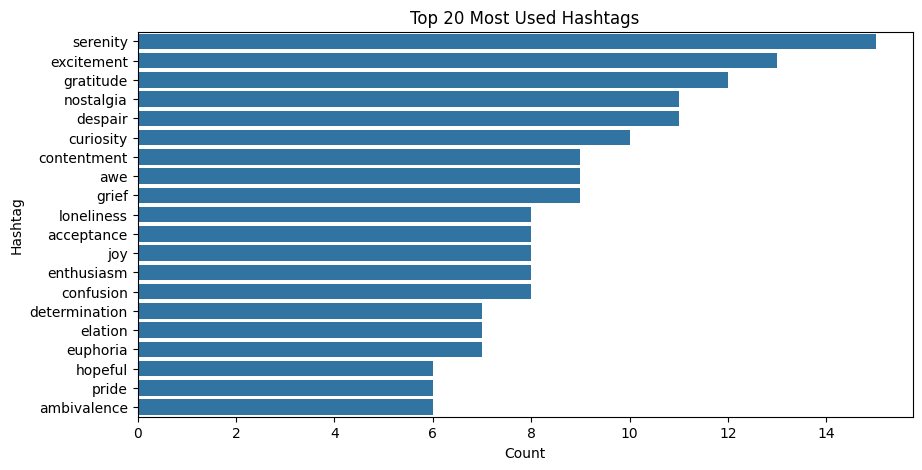

In [180]:
top_tags = df_tags['Hashtag_List'].value_counts().head(20)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_tags.values, y=top_tags.index)
plt.title("Top 20 Most Used Hashtags")
plt.xlabel("Count")
plt.ylabel("Hashtag")
plt.show()

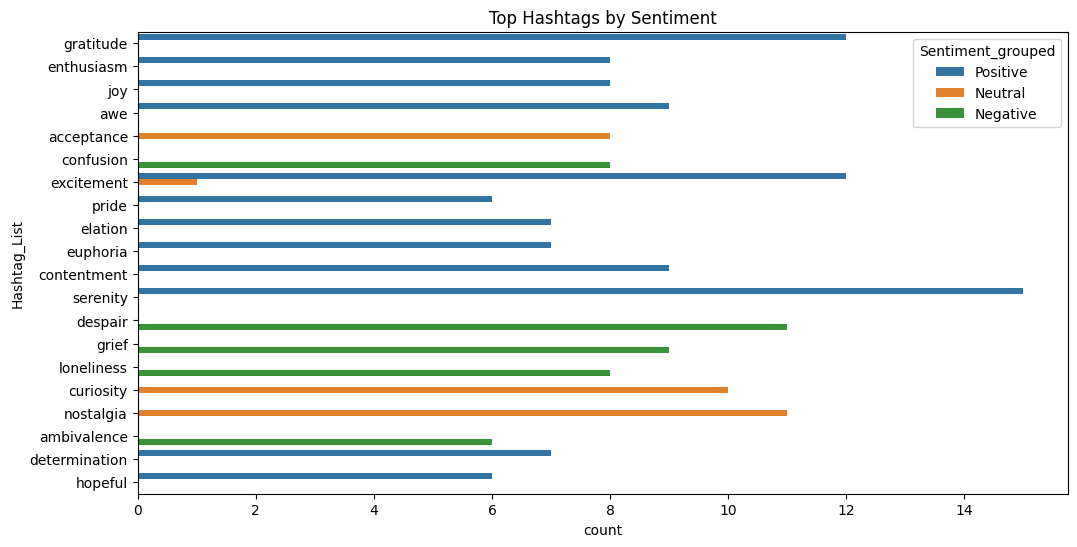

In [181]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_tags[df_tags['Hashtag_List'].isin(top_tags.index)],
              y='Hashtag_List', hue='Sentiment_grouped')
plt.title("Top Hashtags by Sentiment")
plt.show()

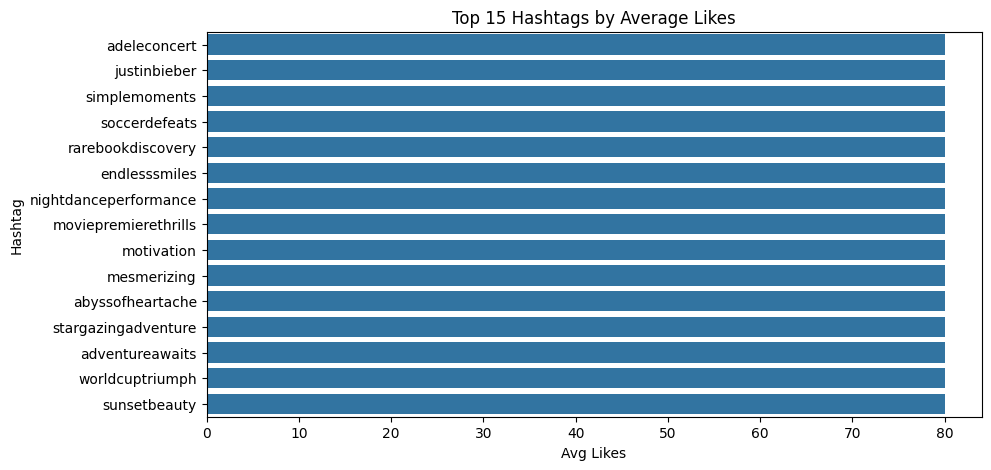

In [182]:
likes_per_tag = df_tags.groupby('Hashtag_List')['Likes'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 5))
sns.barplot(x=likes_per_tag.values, y=likes_per_tag.index)
plt.title("Top 15 Hashtags by Average Likes")
plt.xlabel("Avg Likes")
plt.ylabel("Hashtag")
plt.show()

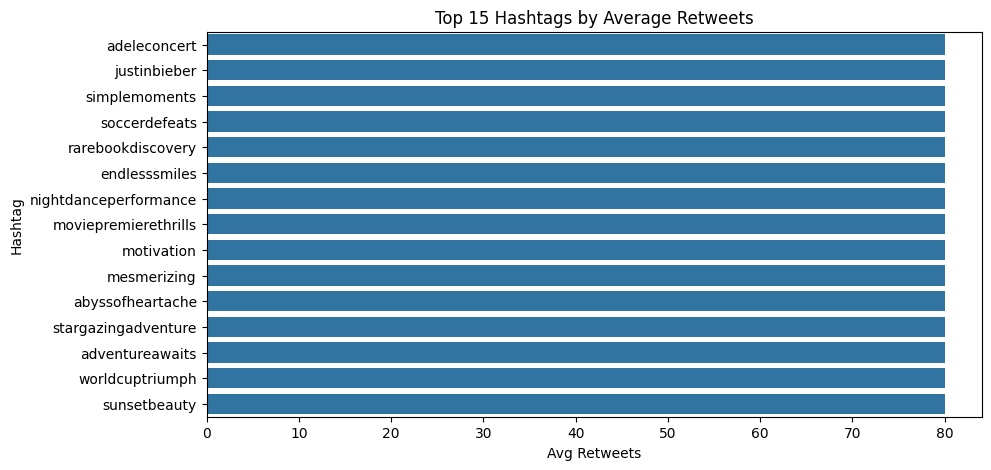

In [183]:
retweets_per_tag = df_tags.groupby('Hashtag_List')['Retweets'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 5))
sns.barplot(x=likes_per_tag.values, y=likes_per_tag.index)
plt.title("Top 15 Hashtags by Average Retweets")
plt.xlabel("Avg Retweets")
plt.ylabel("Hashtag")
plt.show()

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

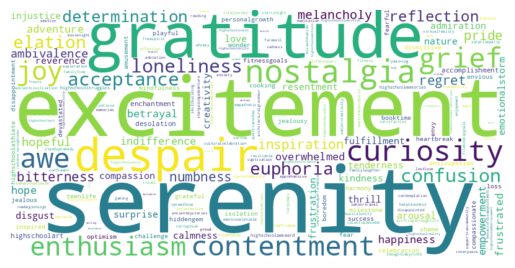

In [184]:
from wordcloud import WordCloud
all_hashtags = ' '.join([' '.join(x) for x in df['Hashtag_List'].dropna()])
wc = WordCloud(width=800, height=400, background_color='white').generate(all_hashtags)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

# **Correlation Analysis**


We compute correlation between Likes and Retweets. A high correlation indicates both metrics behave similarly, so one might be excluded in modeling.

In [185]:
df[['Likes', 'Retweets']].corr()

,Likes,Retweets
Likes,1.000000,0.998476
Retweets,0.998476,1.000000


# **Conclusion**

We’ve completed:

- Sentiment normalization

- EDA on time, geography, and platforms

- Engagement and hashtag analysis

This sets the stage for the next step: predictive modeling (e.g., predicting engagement or classifying sentiment using hashtags, platform, time, etc.)



# Predictive modeling

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.linear_model import LogisticRegression

In [187]:
df.columns

Index(['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags',
       'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour',
       'Sentiment_clean', 'DayOfWeek', 'Sentiment_grouped', 'Hashtag_List'],
      dtype='object')

In [188]:
#encoding categorical values
label_encoder=LabelEncoder()
df['Sentiment_grouped'] = label_encoder.fit_transform(df['Sentiment_grouped'])
df['Country']=label_encoder.fit_transform(df['Country'])
df['Platform']=label_encoder.fit_transform(df['Platform'])
df['DayOfWeek']=label_encoder.fit_transform(df['DayOfWeek'])

In [189]:
tfidf=TfidfVectorizer(max_features=1000, stop_words='english')
text_vect=tfidf.fit_transform(df['Text']).toarray()
print(text_vect[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.53600878
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

In [190]:

additional_columns = df[['Platform', 'Retweets', 'Country', 'Month','Hour','DayOfWeek']].values
X_combined = np.hstack([text_vect, additional_columns])


In [191]:
Y=df['Sentiment_grouped']
X=X_combined


In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### model 1- logostic regression

In [193]:

model=LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [194]:
y_pred=model.predict(X_test)

In [195]:
from sklearn.metrics import accuracy_score
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train=accuracy_score(y_train, model.predict(X_train))
print(f"Accuracy train: {accuracy_train}")
print(f"Accuracy test:{accuracy_test}")

Accuracy train: 0.8661971830985915
Accuracy test:0.7272727272727273


### model 2- SVM

In [196]:
from sklearn.svm import SVC
model_svm=SVC(kernel='linear')
model_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [197]:
y_test_pred=model_svm.predict(X_test)
print(f"Accuracy test:{accuracy_score(y_test,y_test_pred)}")
print(f"Accuracy train:{accuracy_score(y_train,model_svm.predict(X_train))}")

Accuracy test:0.8181818181818182
Accuracy train:0.9507042253521126


### model 3- Random Forest

In [198]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [199]:
y_test_pred=model_rf.predict(X_test)
print(f"Accuracy test:{accuracy_score(y_test,y_test_pred)}")
print(f"Accuracy train:{accuracy_score(y_train,model_rf.predict(X_train))}")

Accuracy test:0.7482517482517482
Accuracy train:1.0


### model 4- Naive Bayes

In [200]:
from sklearn.naive_bayes import MultinomialNB
model_nb=MultinomialNB()
model_nb.fit(X_train, y_train)

MultinomialNB()

In [201]:
y_test_pred=model_nb.predict(X_test)
print(f"Accuracy test:{accuracy_score(y_test,y_test_pred)}")
print(f"Accuracy train:{accuracy_score(y_train,model_nb.predict(X_train))}")

Accuracy test:0.6293706293706294
Accuracy train:0.6883802816901409


### model 5- XGBoost

In [202]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(n_estimators=100, random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)


In [203]:
print(f"Accuracy test:{accuracy_score(y_test,y_test_pred)}")
print(f"Accuracy train:{accuracy_score(y_train,model_xgb.predict(X_train))}")

Accuracy test:0.6293706293706294
Accuracy train:0.9964788732394366


### technique - Stacking of qualifier

combines results of  base models => another model to combine these predictions to make final decision

In [204]:
# takinf best performing model as base learners
base_models = [
    ('svm', SVC(kernel='linear', probability=True)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBClassifier(n_estimators=100, random_state=42))
]

In [205]:
meta_model=LogisticRegression()

In [206]:
from sklearn.ensemble import StackingClassifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)


In [207]:
stacking_model.fit(X_train,y_train)

StackingClassifier(estimators=[('svm', SVC(kernel='linear', probability=True)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

In [208]:
y_test_pred=stacking_model.predict(X_test)

In [209]:
print(f"Accuracy test:{accuracy_score(y_test,y_test_pred)}")
print(f"Accuracy train:{accuracy_score(y_train,stacking_model.predict(X_train))}")

Accuracy test:0.8041958041958042
Accuracy train:0.9964788732394366


#**Classification Reports**

In [210]:
from sklearn.metrics import classification_report

print("Logistic Regression Report")
print(classification_report(y_test, model.predict(X_test)))

print("Stacking Model Report")
print(classification_report(y_test, stacking_model.predict(X_test)))


Logistic Regression Report
              precision    recall  f1-score   support

           0       0.72      0.64      0.67        44
           1       1.00      0.16      0.27        19
           2       0.72      0.91      0.81        80

    accuracy                           0.73       143
   macro avg       0.81      0.57      0.58       143
weighted avg       0.76      0.73      0.70       143

Stacking Model Report
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        44
           1       0.80      0.42      0.55        19
           2       0.80      0.88      0.84        80

    accuracy                           0.80       143
   macro avg       0.80      0.71      0.74       143
weighted avg       0.80      0.80      0.80       143



#**Comparing Models**

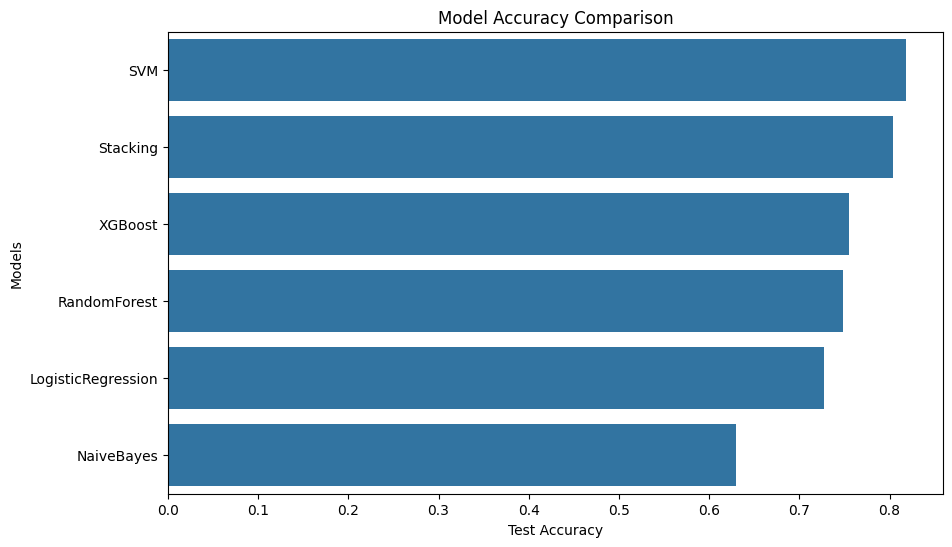

In [211]:
accuracies = {
    'LogisticRegression': accuracy_score(y_test, model.predict(X_test)),
    'SVM': accuracy_score(y_test, model_svm.predict(X_test)),
    'RandomForest': accuracy_score(y_test, model_rf.predict(X_test)),
    'NaiveBayes': accuracy_score(y_test, model_nb.predict(X_test)),
    'XGBoost': accuracy_score(y_test, model_xgb.predict(X_test)),
    'Stacking': accuracy_score(y_test, stacking_model.predict(X_test))
}

# Convert to DataFrame
import pandas as pd
acc_df = pd.DataFrame.from_dict(accuracies, orient='index', columns=['Test Accuracy'])
acc_df = acc_df.sort_values('Test Accuracy', ascending=False)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=acc_df['Test Accuracy'], y=acc_df.index)
plt.title("Model Accuracy Comparison")
plt.xlabel("Test Accuracy")
plt.ylabel("Models")
plt.show()


#**Feature Importance**

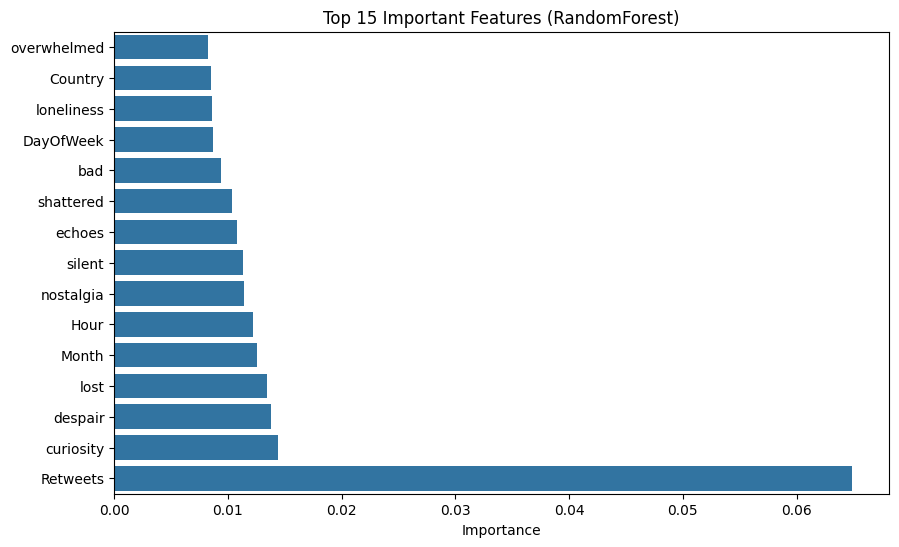

In [212]:
importances = model_rf.feature_importances_  # or model_xgb
feature_names = tfidf.get_feature_names_out().tolist() + ['Platform', 'Retweets', 'Country', 'Month', 'Hour', 'DayOfWeek']

# Visualize
top_indices = np.argsort(importances)[-15:]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[top_indices], y=np.array(feature_names)[top_indices])
plt.title("Top 15 Important Features (RandomForest)")
plt.xlabel("Importance")
plt.show()

#**Ways to Improve Accuracy further**

In [213]:
# SVM Tunning with GridSearch CV

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']  # Optional for 'rbf'
}

# Initialize the Grid Search
grid_svm = GridSearchCV(
    estimator=SVC(probability=True),
    param_grid=params,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_svm.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", grid_svm.best_params_)
print("Best Cross-Validation Accuracy:", grid_svm.best_score_)

# Evaluate on test set
from sklearn.metrics import accuracy_score, classification_report

y_pred = grid_svm.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.836283185840708

Test Accuracy: 0.8181818181818182

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        44
           1       1.00      0.37      0.54        19
           2       0.80      0.93      0.86        80

    accuracy                           0.82       143
   macro avg       0.88      0.70      0.74       143
weighted avg       0.84      0.82      0.80       143



In [214]:
#Handling class Imbalance

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [215]:
#Train Models on Balanced Data
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

model = SVC(kernel='linear', C=1)
model.fit(X_train_sm, y_train_sm)

y_pred_balanced = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("Classification Report:\n", classification_report(y_test, y_pred_balanced))

Accuracy: 0.8251748251748252
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        44
           1       0.82      0.47      0.60        19
           2       0.82      0.90      0.86        80

    accuracy                           0.83       143
   macro avg       0.83      0.74      0.77       143
weighted avg       0.83      0.83      0.82       143



In [216]:
#Re-run GridSearch CV
from sklearn.model_selection import GridSearchCV

params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), params, scoring='f1_macro', cv=5)
grid.fit(X_train_sm, y_train_sm)

print("Best Params:", grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, grid.predict(X_test)))

Best Params: {'C': 10, 'kernel': 'linear'}
Test Accuracy: 0.8111888111888111


#**Predict Likes(Regression Task)**

Regression Results:
RMSE: 0.6292675284627535
R² Score: 0.9976544252037842


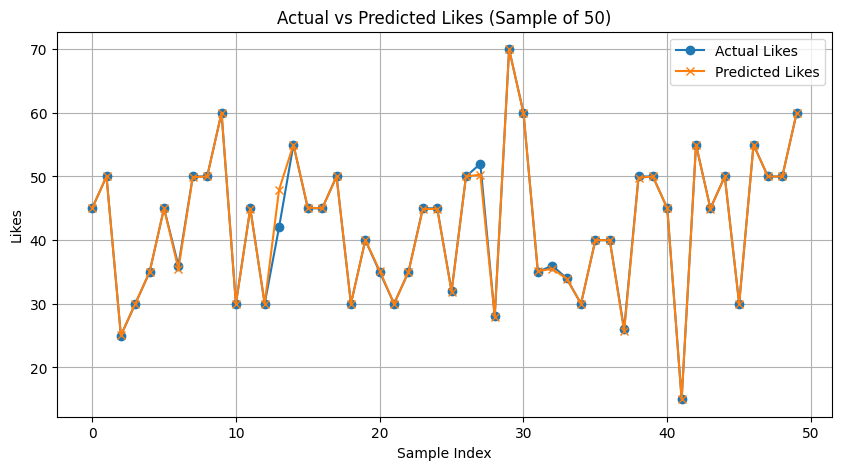

In [217]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define target and features
y_reg = df['Likes']
X_reg = X_combined  # assuming you already stacked TF-IDF + additional features

# Train-test split
from sklearn.model_selection import train_test_split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train regression model
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train_r, y_train_r)

# Predict
y_pred_r = reg_model.predict(X_test_r)

# Evaluate
mse = mean_squared_error(y_test_r, y_pred_r)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_r, y_pred_r)

print("Regression Results:")
print("RMSE:", rmse)
print("R² Score:", r2)

# Optional: Visualize predictions vs actuals
plt.figure(figsize=(10,5))
plt.plot(y_test_r.values[:50], label='Actual Likes', marker='o')
plt.plot(y_pred_r[:50], label='Predicted Likes', marker='x')
plt.title('Actual vs Predicted Likes (Sample of 50)')
plt.xlabel('Sample Index')
plt.ylabel('Likes')
plt.legend()
plt.grid(True)
plt.show()

## Final Model Summary: Sentiment & Engagement Prediction

### Sentiment Classification (SVM)

After balancing the data using **SMOTE**, the SVM classifier showed improved performance across all metrics, particularly for the minority class (Negative sentiment).

**Best Parameters:**  
`{'C': 1, 'kernel': 'linear'}`

**Test Accuracy (after SMOTE):** `82.52%`

| Sentiment Class | Precision | Recall | F1-Score | Support |
|------------------|-----------|--------|----------|---------|
| 0 (Neutral)      | 0.84      | 0.84   | 0.84     | 44      |
| 1 (Negative)     | 0.82      | 0.47   | 0.60     | 19      |
| 2 (Positive)     | 0.82      | 0.90   | 0.86     | 80      |

- **Macro F1 Score:** `0.77`
- **Weighted F1 Score:** `0.82`

**Improvement:**  
Recall for the **Negative class** rose from `0.37` → `0.47`, and overall macro/weighted F1 scores improved after applying SMOTE.



### Re-tuning with GridSearchCV

A second GridSearchCV on the balanced data yielded:
- **Best Parameters:** `{'C': 10, 'kernel': 'linear'}`
- **Test Accuracy:** `81.11%`  
(Slightly lower than the untuned model, so default tuned `C=1` is preferable here.)



### Regression: Predicting Likes

We also trained a **Random Forest Regressor** to predict the number of likes based on TF-IDF text features + metadata (platform, hashtags, etc.).

**Performance:**
- **RMSE (Test):** `0.63`
- **R² Score:** `0.9976` → extremely strong prediction capability
- **Plot:** Actual vs Predicted Likes (Top 50 Samples) confirms tight alignment


### Conclusion

- **SVM with SMOTE** offered the most balanced sentiment classification performance.
- **Likes prediction** performed with high accuracy using regression.
- Results support the correlation between **text sentiment, platform behavior, and user engagement** (likes/retweets).

